In [1]:
import os.path
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('../data/playData.csv')
print(f"Shape of the dataframe: {df.shape}")
display(df.head())

Shape of the dataframe: (454011, 31)


,game_id,eventIdx,season,game_type,start_time,end_time,away_team_id,away_team_name,home_team_id,home_team_name,...,period,periodType,periodTime,periodTimeRemaining,is_goal,Assist_first,Assist_last,Scorer,Goalie,Shooter
0,2016020001,9,20162017,R,2016-10-12T23:00:00Z,2016-10-13T01:56:40Z,10,Toronto Maple Leafs,9,Ottawa Senators,...,1,REGULAR,01:11,18:49,0,NaN,NaN,NaN,Craig Anderson,Mitchell Marner
1,2016020001,48,20162017,R,2016-10-12T23:00:00Z,2016-10-13T01:56:40Z,10,Toronto Maple Leafs,9,Ottawa Senators,...,1,REGULAR,09:00,11:00,0,NaN,NaN,NaN,Frederik Andersen,Erik Karlsson
2,2016020001,97,20162017,R,2016-10-12T23:00:00Z,2016-10-13T01:56:40Z,10,Toronto Maple Leafs,9,Ottawa Senators,...,1,REGULAR,17:21,02:39,0,NaN,NaN,NaN,Craig Anderson,Martin Marincin
3,2016020001,137,20162017,R,2016-10-12T23:00:00Z,2016-10-13T01:56:40Z,10,Toronto Maple Leafs,9,Ottawa Senators,...,2,REGULAR,02:02,17:58,0,NaN,NaN,NaN,Frederik Andersen,Marc Methot
4,2016020001,161,20162017,R,2016-10-12T23:00:00Z,2016-10-13T01:56:40Z,10,Toronto Maple Leafs,9,Ottawa Senators,...,2,REGULAR,06:19,13:41,0,NaN,NaN,NaN,Craig Anderson,Connor Carrick


In [38]:
# Pivot tabe shotType, event, 
df_pivot = df.pivot_table(index=['shotType'], 
                          columns='event', 
                          values='eventIdx', 
                          aggfunc='count',
                          fill_value=0)
df_pivot

event,Goal,Shot
shotType,,
Backhand,4296,32220
Deflected,1344,6732
Slap Shot,4407,62897
Snap Shot,6539,57850
Tip-In,4044,19362
Wrap-around,305,4092
Wrist Shot,22651,227222


In [39]:
df_pivot['Total Shots'] = df_pivot['Goal'] + df_pivot['Shot']

# Success Ratio: probability of scoring a goal if you play that shot : P(Goal|shortType)
df_pivot['Success Ratio'] = df_pivot['Goal'] *100/ df_pivot['Total Shots']

# Goal proportion of shot type x: P(shortType|Goal)
df_pivot['Goal proportion'] = df_pivot['Goal'] *100/ df_pivot['Goal'].sum()
#df_pivot['Shot proportion'] = df_pivot['Shot'] *100/ df_pivot['Shot'].sum()

# Shot proportion of shot type x: P(shortType|Shot)
df_pivot['Shot proportion'] = df_pivot['Total Shots'] *100/ df_pivot['Total Shots'].sum()

# Expected value of 
df_pivots

event,Goal,Shot,Total Shots,Success Ratio,Goal proportion,Shot proportion
shotType,,,,,,
Backhand,4296,32220,36516,11.764706,9.856376,8.043863
Deflected,1344,6732,8076,16.641902,3.083559,1.779007
Slap Shot,4407,62897,67304,6.547902,10.111045,14.825943
Snap Shot,6539,57850,64389,10.155461,15.002524,14.183818
Tip-In,4044,19362,23406,17.277621,9.278209,5.155950
Wrap-around,305,4092,4397,6.936548,0.699766,0.968585
Wrist Shot,22651,227222,249873,9.065005,51.968522,55.042834


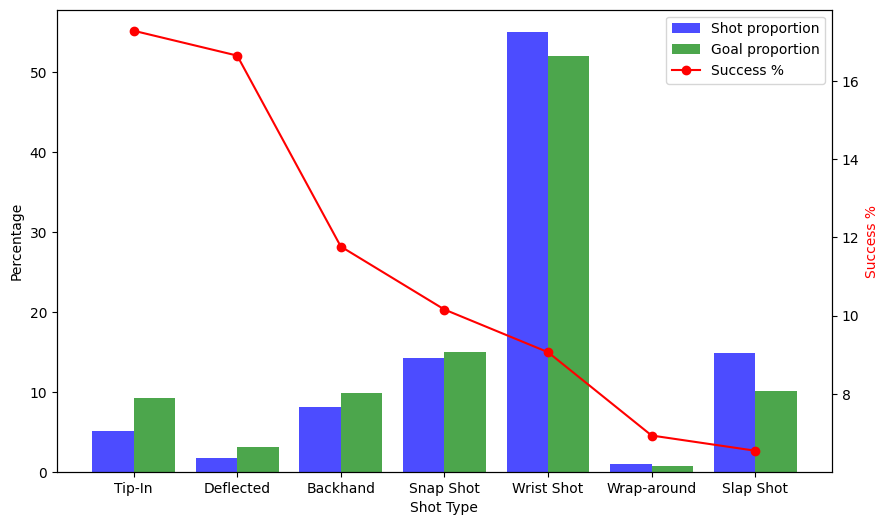

In [45]:
# Data
# sort df_pivot by Success Ratio
df_pivot = df_pivot.sort_values(by='Success Ratio', ascending=False)

categories = df_pivot.index
bar1_data = df_pivot['Shot proportion']
bar2_data = df_pivot['Goal proportion']
line_data = df_pivot['Success Ratio']

x = np.arange(len(categories))

# Create a figure and the first axis (for the first bar plot)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create the first bar plot on the first axis
ax1.bar(x - 0.2, bar1_data, width=0.4, color='b', alpha=0.7, label='Shot proportion')
ax1.bar(x + 0.2, bar2_data, width=0.4, color='g', alpha=0.7, label='Goal proportion')
ax1.set_xlabel('Shot Type')
ax1.set_ylabel('Percentage')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
#ax1.legend(loc='upper left')

# Create the second axis (for the line plot) sharing the same x-axis
ax2 = ax1.twinx()

# Create the line plot on the second axis
ax2.plot(x, line_data, color='r', marker='o', linestyle='-', label='Success %')
ax2.set_ylabel('Success %', color='r')

# Add a legend for the line plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Set the title and display the plot
#plt.title('Two Bar Plots and One Line Plot with Multiple Axes')
plt.show()


1. Shot proportion: Estimation of shot type given a shot was made. For eg. If a shot was made, what is the probability that it was a backhand shot?

2. Goal proportion: 

## Q2

In [46]:
def euclidian_distance_goal(x_shot : int, y_shot : int,
                            period : int , home = True) -> float:
    y_goal = 0
    x_goal = 89 if x_shot > 0 else -89
    return np.linalg.norm(np.array([x_shot, y_shot]) - np.array([x_goal, y_goal]))

df['shot_distance'] = df.apply(lambda row: euclidian_distance_goal(x_shot = row['x_coordinate'], 
                                           y_shot = row['y_coordinate'], 
                                           period = row['period'],
                                           home = (row['home_team_name'] == row['team_name'])),axis=1)